<a href="https://colab.research.google.com/github/plaban1981/MI-Initiative/blob/master/Credit_Card_Risk_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit_Card-Risk-assessment

## Import Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost

# Import Training dataset

In [0]:
#from google.colab import files
#files.upload()

In [3]:
df = pd.read_csv('Credit_default_dataset.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Selecting the Features /Predictors for the Model

In [0]:
X = df.drop(['ID','default.payment.next.month'],axis=1)
Y = df['default.payment.next.month']

##changing the name of  pay_0 column to pay_1 to make the numbering correct

In [0]:
 X = X.rename(columns={'PAY_0':'PAY_1'})

In [7]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [8]:
X['SEX'].unique()

array([2, 1])

In [9]:
X['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [10]:
X['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

##Normalizing the Predictors

In [0]:
scaling=StandardScaler()
X=scaling.fit_transform(X)

In [12]:
X

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [13]:
Y = Y.values
Y

array([1, 1, 0, ..., 1, 1, 1])

## Split the data into training and validation set

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

## Applying XGBOOST Classifier

## Defining Hyperparameters

In [0]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [0]:
classifier=xgboost.XGBClassifier()

In [0]:
grid = GridSearchCV(classifier,params,scoring='roc_auc',cv=5,n_jobs=-1,verbose=3)

In [0]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed: 60.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 76.8min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 95.3min
[Parallel(n_jobs=-1)]: Done 3868 tasks      | elapsed: 114.4min
[Parallel(n_jobs=-1)]: Done 4604 tasks      | elapsed: 136.0min
[Parallel(n_jobs=-1)]: Done 5404 tasks      | elapsed: 165.2min


KeyboardInterrupt: ignored

In [0]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [19]:
random_search.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distribu

In [20]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5}

In [0]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
y_pred_proba = classifier.predict_proba(X_test)

## Accuracy Score

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score : ",accuracy_score(y_test,y_pred)*100.0,'%')

Accuracy Score :  81.61666666666667 %


## Visualize ROC curve

In [38]:
!pip install scikit-plot

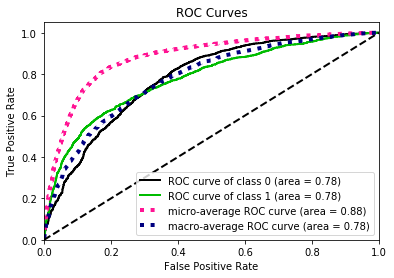

In [0]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

## Confusion Matrix

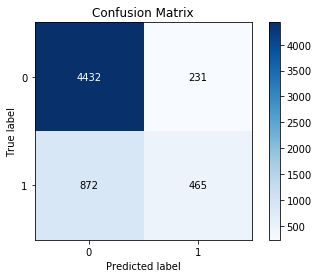

In [0]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

## Applying RandomForrest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [30]:
print("Accuracy Score : ",accuracy_score(y_test,y_pred)*100.0,'%')

Accuracy Score :  81.31666666666668 %


## Grid search for finding best hyperparameters

In [0]:
params = {
    'n_estimators'      : [100,320,330,340],
    'max_depth'         : [8, 9, 10, 11, 12],
    'random_state'      : [0],
    'max_features': ['auto','sqrt'],
    #'criterion' :['gini']
}

In [0]:
grid = RandomizedSearchCV(RandomForestClassifier(),params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [55]:
grid.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [58]:
grid.best_params_

{'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 330,
 'random_state': 0}

In [60]:
grid.best_score_

0.7800799143866102

## Using the Best parameters

In [0]:
rf = RandomForestClassifier(max_depth = 11,max_features='sqrt',n_estimators=330,random_state=0)

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=330,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
y_pred = rf.predict(X_test)

In [0]:
y_pred_proba = rf.predict_proba(X_test)

In [65]:
print("Accuracy Score  Random Forest Classifier : ",accuracy_score(y_test,y_pred)*100.0,'%')

Accuracy Score  Random Forest Classifier :  81.81666666666668 %


## Confusion Matrix - RandomForest Classifier

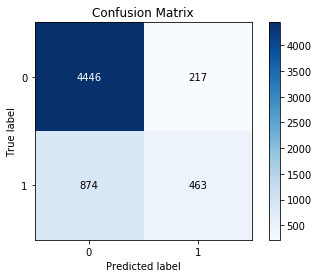

In [66]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

## ROC Curve RandomForest Clasifier

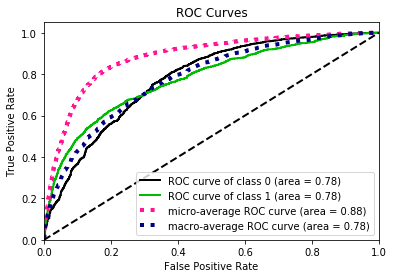

In [67]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)

## Note :
 The accuracy score of RandomForestClassifier is 85.8% which is better as compared to accuracy score of 81.6 %  with XGBoostClassifier

## Apply LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [0]:
params ={'penalty':['l2','l1'],'max_iter' :[100,150,200]}

## Apply  randomised gride search 

In [0]:
grid = RandomizedSearchCV(lr,params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=1)

In [71]:
grid.fit(X,Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'max_iter': [100, 150, 200],
                                        'penalty': ['l2', 'l1']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', v

In [72]:
grid.best_params_

{'max_iter': 150, 'penalty': 'l2'}

In [73]:
grid.best_score_

0.721646167333928

## Applying best parameters for LogisticRegression

In [0]:
lr = LogisticRegression(penalty = 'l2',max_iter= 150)

In [75]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
y_pred_proba = rf.predict_proba(X_test)

In [80]:
print("Accuracy Score  LogisticRegression Classifier : ",accuracy_score(y_test,y_pred)*100.0,'%')

Accuracy Score  LogisticRegression Classifier :  80.68333333333332 %


## Confusion Matrix - LogisticRegression

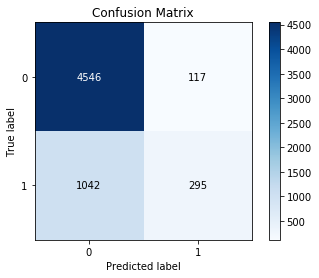

In [78]:
scikitplot.metrics.plot_confusion_matrix(y_test,y_pred)

## ROC Curve - LogisticRegression

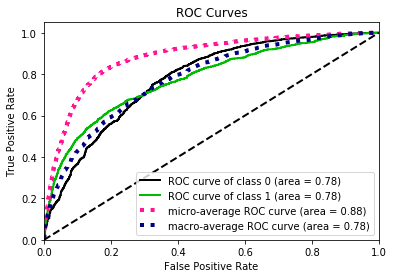

In [79]:
scikitplot.metrics.plot_roc(y_test,y_pred_proba)